<a href="https://colab.research.google.com/github/PardhaSaradhi74/Python/blob/master/ICP6/PythonICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Reading dataset and replacing null values with mean

In [5]:
data = pd.read_csv("/content/drive/My Drive/Python/ICP6/CC.csv")
X=data.iloc[:,1:]
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)


Applying Elbow method to determine K value

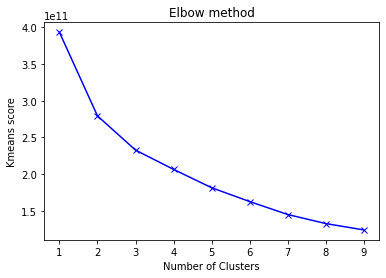

In [6]:
inertias = []
K = range(1,10)
for k in K: 
    kmeanModel = KMeans(n_clusters=k,random_state=42) 
    kmeanModel.fit(X) 
    inertias.append(kmeanModel.inertia_)
    
plt.plot(range(1,10),inertias,'bx-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Kmeans score')
plt.show()

Applying KMeans Clustering without scaling

In [7]:
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(X)
y_cluster_kmeans = km.predict(X)

Calculating Silhouette score

In [8]:

score_beforescaling = metrics.silhouette_score(X, y_cluster_kmeans)
print("score that occurs before scaling:",score_beforescaling)

score before scaling is: 0.4654251280958053


Applying feature scaling

In [9]:
from sklearn import preprocessing 
scaler =preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array=scaler.transform(X) 
X_scaled=pd.DataFrame(X_scaled_array)

Applying KMeans after scaling

In [10]:

nclusters = 3
km = KMeans(n_clusters=nclusters,random_state=42)
km.fit(X_scaled)
y_cluster_kmeans = km.predict(X_scaled)

Calculating Silhouette score after scaling

In [11]:
score_afterscaling = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("score after scaling is done:",score_afterscaling)

score after scaling is: 0.25059934300557285


Applying PCA

In [12]:
from sklearn.decomposition import PCA
pca= PCA(2) 
X_pca= pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca)
finaldata = pd.concat([X_pca, data[['TENURE']]], axis=1)


Applying KMeans after PCA

In [13]:
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(X_pca)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_pca)
score_pca = metrics.silhouette_score(X_pca, y_cluster_kmeans)
print("PCA and Kmeans scores: ", score_pca)

Score with PCA and Kmeans:  0.5720003152910856


KMeans model after applying PCA on scaled data

In [14]:

pca_scaled = PCA(2)
X_pca_scaled= pca_scaled.fit_transform(X_scaled)
kmeans_pca_scaled = KMeans(n_clusters=3)
kmeans_pca_scaled.fit(X_pca_scaled)
y_pca_kmeans_scaled = kmeans_pca_scaled.predict(X_pca_scaled)


Calculating Silhouette score of applying PCA on scaled data

In [15]:
pca_scaled_score = metrics.silhouette_score(X_pca_scaled, y_pca_kmeans_scaled)
print("PCA and Kmeans scores: ", pca_scaled_score )

Score with PCA and Kmeans:  0.45232419861233447


Score comparisons

In [16]:
print("score before scaling is:",score_beforescaling)
print("score after scaling is:",score_afterscaling)
print("Score with PCA and Kmeans: ", score_pca)
print("Score with PCA and Kmeans: ", pca_scaled_score )

score before scaling is: 0.4654251280958053
score after scaling is: 0.25059934300557285
Score with PCA and Kmeans:  0.5720003152910856
Score with PCA and Kmeans:  0.45232419861233447


Plotting clusters

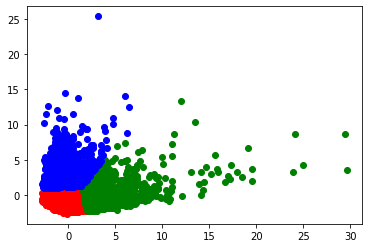

In [17]:

colors=["red","green","blue"]
for i in range(3):
    x_axis=X_pca_scaled[y_pca_kmeans_scaled == i][:, 0]
    y_axis=X_pca_scaled[y_pca_kmeans_scaled == i][:,1]
    plt.scatter(x_axis,y_axis,color=colors[i])